# K-Means
Realizando os imports e inicializando o dataframe com o arquivo CSV

In [1]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import pandas as pd

CSV_FULL_PATH = '../CSVs/pokemon.csv'

data_pandas = pd.read_csv(CSV_FULL_PATH)
df = pd.DataFrame(data_pandas)

x = df.drop(['attack', 'defense', 'sp_attack', 'sp_defense', 'is_legendary', 'name'], axis=1)

## Encontrando o melhor valor de 'k'
Aplicamos o método do 'elbowv' para encontrar o melhor valor de 'k' para o nosso modelo

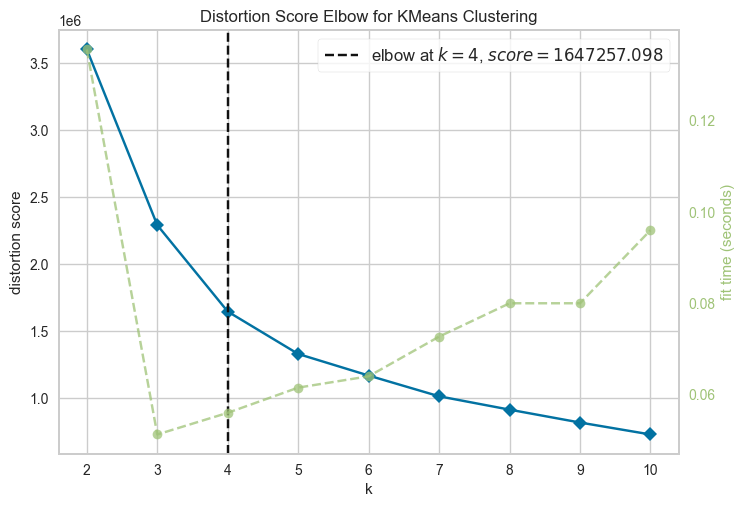

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
x = df.drop(['attack', 'defense', 'sp_attack', 'sp_defense', 'is_legendary', 'name'], axis=1)

kmeans = KMeans(n_init=10)
elbowv = KElbowVisualizer(kmeans, k=(2, 11))
elbowv.fit(x)
elbowv.show()

## Aplicando o algorimo de K-Means com o melhor valor de 'k'
Vamos agora aplicar o algoritmo de K-Means com o melhor valor de 'k' encontrado anteriormente.
Iremos também ver como a distribuição fica para cada cluster.

In [3]:
best_k = elbowv.elbow_value_
bestk_kmeans = KMeans(n_clusters=best_k, n_init=10)
bestk_kmeans.fit(x)

df['cluster'] = bestk_kmeans.labels_
df = df.drop(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'], axis=1)
df

,name,base_total,is_legendary,cluster
0,Bulbasaur,318,0,1
1,Ivysaur,405,0,3
2,Venusaur,525,0,0
3,Charmander,309,0,1
4,Charmeleon,405,0,3
...,...,...,...,...
796,Celesteela,570,1,2
797,Kartana,570,1,2
798,Guzzlord,570,1,2
799,Necrozma,600,1,2
